<font size=4 color='blue'>

# Clase 4, octubre 14 del 2020

<font size=4 color='blue'>

## Topico: Mortalidad por diabetes

<font size=4 color='blue'>
    
## Información sobre el tópico

<font size=4>

Evolución de la diabetes después de un año.
    
En el presente trabajo, la diabetes la caracterizamos con los siguientes diez rasgos: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo (S1, S2, S3, S4, S5, S6).


<font size=4 color='blue'>
    
## Cuantificación de esta información

<font size=4>

Se tiene información de 442 pacientes (m = 442). La respuesta de interés, Y, es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de Y varían entre 25 y 346

Fuente de la información: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Los datos se encuentran el el archivo diabetes.csv

df = pd.read_csv('diabetes.csv', sep ='\t')

# se crea el dataframe df, el cual contiene los 10 rasgos relevantes de los pacientes
# diabeticos, así como el progreso (y) de la enfermedad un año después de comenzado el estudio. 

In [3]:
# Se despliegan las primeras 5 muestras (rasgos, objetivo)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
# el método describe() genera una tabla con informacion estadistica de cada uno de los rasgos y del objetivo.
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


<font size=5 color='blue'>

Regression analysis

<font size=4 color='black'>
    
In statistical modeling, $\textbf {regression analysis}$ is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').
    
More: [Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)

<font size=4>

Se reordenan la muestras (los renglones del DataFrame) al azar.

In [5]:
df = df.sample(frac=1)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
229,41,2,24.9,86.0,192,115.0,61.0,3.00,4.3820,94,53
277,39,1,20.9,95.0,150,65.6,68.0,2.00,4.4067,95,64
358,43,1,18.5,87.0,163,93.6,61.0,2.67,3.7377,80,90
371,63,2,25.5,109.0,226,103.2,46.0,5.00,5.9506,87,197
118,33,2,25.4,102.0,206,141.0,39.0,5.00,4.8675,105,179


<font size=4>
    
Se dividen la muestras en 2 conjuntos: 90 % para el entrenamiento y 10 % para evaluar el desarrollo. 

In [6]:
val_ratio = 0.1
train_ratio = int((1.0-val_ratio)*len(df))

df_train = df[0:train_ratio]
df_val = df[train_ratio:]

## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

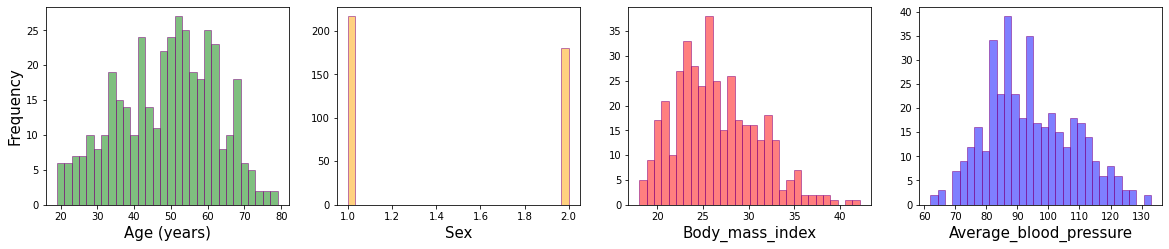

In [7]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df_train.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df_train.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Average_blood_pressure', size=15);

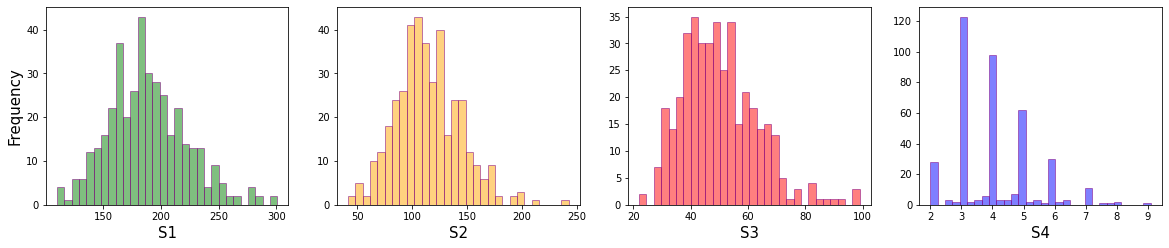

In [8]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S1', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S2', size=15)

ax3.hist(df_train.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('S3', size=15)

ax4.hist(df_train.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('S4', size=15);

Text(0.5, 0, 'Y')

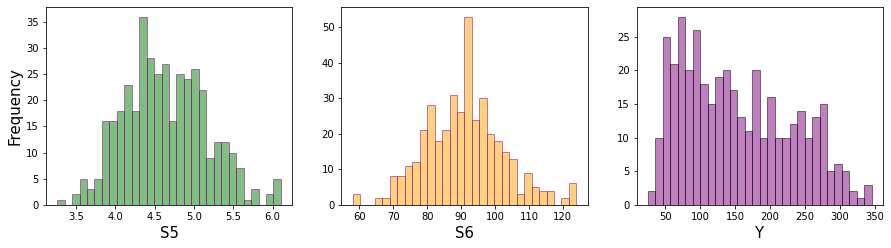

In [9]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S5', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S6', size=15)

ax3.hist(df_train.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>

Para trabajar con los modelos se requiere que todas las variables tengan el mismo orden de magnitud. Por ello estas se normalizan, tanto los rasgos (X) y las objetivo o referencia (Y):

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [10]:
mean_train = df_train.mean()
std_train = df_train.std()

df_train_norm = (df_train - mean_train) /std_train
df_val_norm = (df_val - mean_train) /std_train

[Normalization](https://jamesmccaffrey.wordpress.com/2019/01/04/how-to-normalize-training-and-test-data-for-machine-learning/)

<font size=4>
    
Histogramas de las variables normalizados:

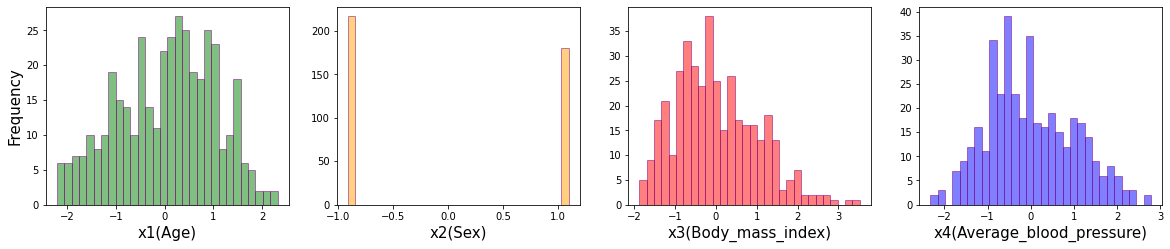

In [11]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Average_blood_pressure)', size=15);

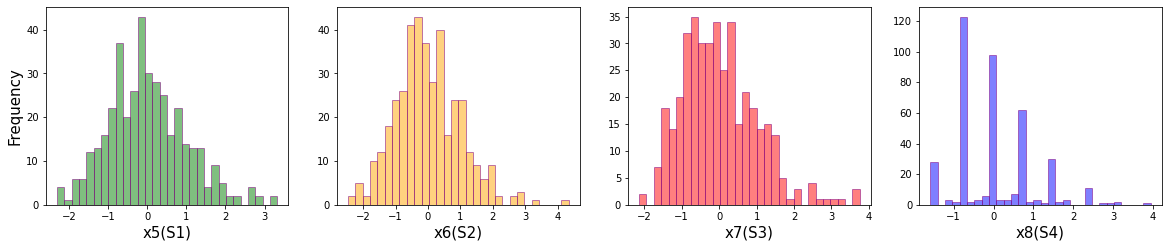

In [12]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(S1)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(S2)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(S3)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(S4)', size=15);

Text(0.5, 0, 'Y')

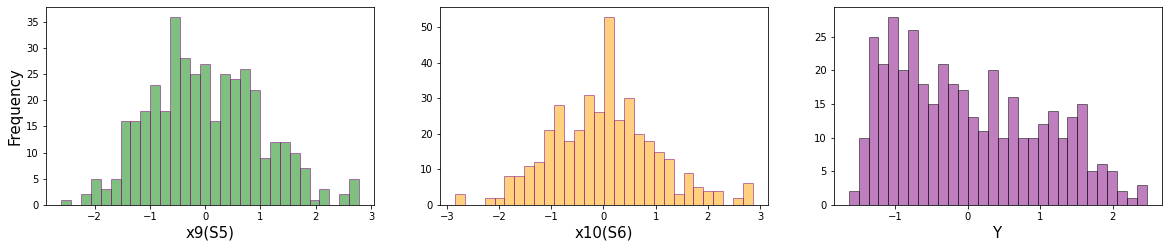

In [13]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(S5)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(S6)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>
Los valores de las variables X e Y se extraen de las columnas del DataFrame df.

In [14]:
train_x = df_train_norm.values[:,:-1]
print(type(train_x))
print(train_x.shape)

<class 'numpy.ndarray'>
(397, 10)


In [15]:
train_y = df_train_norm.values[:,-1:]
print(type(train_y))
print(train_y.shape)

<class 'numpy.ndarray'>
(397, 1)


In [16]:
val_x = df_val_norm.values[:,:-1]
print(type(val_x))
print(val_x.shape)

<class 'numpy.ndarray'>
(45, 10)


In [17]:
val_y = df_val_norm.values[:,-1:]
print(type(val_y))
print(val_y.shape)

<class 'numpy.ndarray'>
(45, 1)


In [18]:
train_x = train_x.T
val_x = val_x.T

In [19]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(10, 397)
(397, 1)
(10, 45)
(45, 1)


<font size=5 color='blue'>

# <center> Linear Regression Analysis </center>

<font size=5 color='blue'>
    
Implementacion de un sistema de aprendizaje, empleando un análisis de regresion lineal

<font size=4 >
Los pasos principales para construir el sistema son:

1. Definir un modelo proponiendo un algoritmo que relacione las variables X y Y.
2. Inicializar las variables asociadas al modelo, $w, b$ (pesos y biases).
3. Realizar lo siguiente en cada época:
     - Calcular el costo ($J$).
     - Calcular el gradiente del costo respecto a las variables asociadas al modelo.
     - Actualizar los pesos y los biases empleando el algoritmo propuesto para optimización. Por ejemplo, gradiente descendente 

<font size=5 color='blue'>
Algoritmo que relaciona las variables X y Y

<font size=4 >
    
Se tienen $m$ muestras.
    
Para una muestra $x^{(i)}$:

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

$z^{(i)}$ es la combinacion lineal entre los pesos $(w)$ y la muestra $x^{(i)}$ + el bias $b$. Posteriormente esta suma es transformada (activada) con una función, para generar le valor de salida $a^{(i)}$. En el presente caso, la función es la identidad (*identity*), porque realizaremos una regresión lineal.

$$f(z^{(i)}) = a^{(i)} = identity(z^{(i)}\tag{2})$$ 

La función de perdida (*loss*), también llamada costo *cost*, $J$, es el promedio, sobre todas las muestras, de la diferencia al cuadrado entre el valor medido ($y^{(i)}$) y el valor que predice la función de activación ($f(x^{(i)})$).  

$$ J = \frac{1}{m} \sum_{i=1}^m (y^{(i)} -f(x^{(i)}))^2\tag{3}$$




    
## 1. Se inicializan las variables del algoritmo que define la relación entre X y Y. 

<font size=4>
Debido a que las variables X y Y fueron normalizadas a distribuciones con un deviación estándard de 1, las variables $w$ se inicializan con valores pequeños, mientras que los biases se inicializan a cero.

In [20]:
def initialize_params(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [21]:
#Testing the function initialize_params (dim)

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.00736577]
 [ 0.08754524]
 [-0.01741686]
 [-0.07542277]
 [-0.07031972]
 [-0.06964442]
 [-0.0150197 ]
 [ 0.09849876]
 [-0.03401991]
 [ 0.08897007]]
b = 0


   
## 2. Calculo de la función de costo y sus derivadas parciales

<font size=4>
Una vez inicializados los pesos y los biases, se calcula la función de costo, y también sus derivadas parciales respecto a cada uno de los pesos y los biases, las cuales serán empleadas para proponer nuevos valores tanto para los pesos como para los biases. 

La función *propagate( )* calcula la función de costo y su gradiente:

- Se tiene a X


- Se calcula $A = (W^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$


- Se calcula la función de costo: $J = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} -f(z^{(i)}))^2$


Las derivadas de la función de costo respecto a los pesos $ w$ y el bias $ b$ son:


$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (f(z^{(i)})-y^{(i)}))\tag{8}$$

In [22]:
#Función para transformar los efectos no lineales. En el presente caso se considera un modelo completamente
#lineal. Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z
    
    return s

In [23]:
def propagate(w, b, X, Y,X_val,Y_val):
    
    m = X.shape[1]
    m_val = X_val.shape[1]
    
    A = identity(np.dot(w.T, X)+b)
    A_val = identity(np.dot(w.T,X_val)+b)
    
    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)
    
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)
    

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    cost_val = np.squeeze(cost_val)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, cost_val

## 3. Actualizacion de los pesos y el bias

<font size=4>
    
La función *optimize(  )*  actualiza a los pesos $w$ y al bias $b$ usando el método de gradiente descendente.
Se calculan los costos tanto para las muestras para el entrenamiento como para las muestras para el desarrollo del aprendizaje.
    
Los pesos $ w $ y el bias $ b $ son modificados en cada época hasta que la función de costo $ J $ llega a su valor mínimo. 

Para el peso $ w $, la regla de actualización es $ w = w - \alpha \text {} dw $, donde $ \alpha $ es el parámetro de aprendizaje.

Para el bias $ b $, la regla de actualización es $ b = b - \alpha \text {} db $, donde $ \alpha $ es el parámetro de define la relación de aprendizaje.

In [24]:
def optimize(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):
    
    costs = []
    costs_val = []
    
    for i in range(epochs):
        
        
        grads, cost, cost_val = propagate(w, b, X, Y,X_val,Y_val)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after epoch %i: %f %f" %(i, cost, cost_val))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, costs_val

## 4. Calculo de predicciones.

<font size=4>
    
Una vez que se encuentran los valores del peso w y del bias b que minimizan la función de costo, se emplean para inferir los valores Y asociados con un conjunto de datos X.

La función `predic()` calcula $f(w ^ T X + b)$ empleando los valores de $w$ y $b$ para los cuales el costo es mínimo.


In [25]:
def predict(w, b, X):
    
    w = w.reshape(X.shape[0], 1)
    A = identity(np.dot(w.T, X)+b)
    
    return A

<font size=4>
Para calcular la precision del modelo se usa el error medio cuadático, MSE:

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m}\Sigma_{i}(y_{i}-a_{i})^2)*100$$

## 5. Modelo: se juntan los pasos 1, 2, 3 y 4

In [26]:
def model(X_train, Y_train, X_val, Y_val, epochs = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_val -- test set represented by a numpy array of shape (num_px * num_px * 3, m_val)
    Y_val -- test labels represented by a numpy array (vector) of shape (1, m_val)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
        
    # 1. inicializacion de parametros
    w, b = initialize_params(X_train.shape[0])

    # 2. y 3. Actualizacion de parametros
    parameters, grads, costs, costs_val = optimize(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # 4. Predicciones
    Y_prediction_val = predict(w, b, X_val)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/val Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("val accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))

    
    d = {"costs": costs, "costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d

In [27]:
epochs = 2000
learning_rate = 0.01
d = model(train_x, train_y.T, val_x, val_y.T, epochs = epochs, 
          learning_rate = learning_rate, print_cost = True)

Cost and Cost_val after epoch 0: 1.083552 0.890042
Cost and Cost_val after epoch 100: 0.514140 0.523208
Cost and Cost_val after epoch 200: 0.486792 0.446322
Cost and Cost_val after epoch 300: 0.482353 0.424205
Cost and Cost_val after epoch 400: 0.481461 0.417212
Cost and Cost_val after epoch 500: 0.481224 0.414854
Cost and Cost_val after epoch 600: 0.481131 0.414030
Cost and Cost_val after epoch 700: 0.481075 0.413725
Cost and Cost_val after epoch 800: 0.481031 0.413591
Cost and Cost_val after epoch 900: 0.480991 0.413509
Cost and Cost_val after epoch 1000: 0.480952 0.413438
Cost and Cost_val after epoch 1100: 0.480915 0.413368
Cost and Cost_val after epoch 1200: 0.480879 0.413296
Cost and Cost_val after epoch 1300: 0.480843 0.413221
Cost and Cost_val after epoch 1400: 0.480809 0.413145
Cost and Cost_val after epoch 1500: 0.480775 0.413069
Cost and Cost_val after epoch 1600: 0.480741 0.412992
Cost and Cost_val after epoch 1700: 0.480709 0.412915
Cost and Cost_val after epoch 1800: 0.48

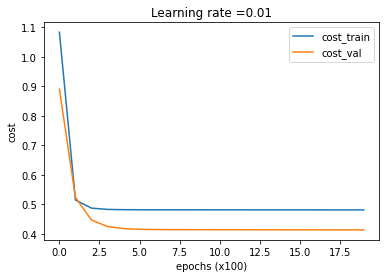

In [29]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.plot(costs)
plt.plot(costs_val)
plt.ylabel('cost')
plt.xlabel('epochs (x100)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['cost_train', 'cost_val'],loc=0);



learning rate is:  0.01
train accuracy: 51.89913699436864 %
val accuracy: 58.63765784199386 %

-------------------------------------------------------

learning rate is:  0.005
train accuracy: 51.837963584696325 %
val accuracy: 58.500781884056906 %

-------------------------------------------------------

learning rate is:  0.001
train accuracy: 51.51476159597434 %
val accuracy: 56.22872582385027 %

-------------------------------------------------------



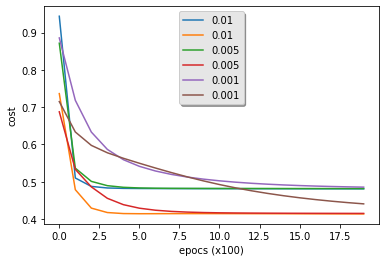

In [31]:
learning_rates = [0.01, 0.005, 0.001]
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model(train_x, train_y.T, val_x, val_y.T, epochs = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('epocs (x100)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90');

<font size=5 color='blue'>

# <center> Non-Linear Regression Analysis </center>

<font size=4>
    
Consideramos que la variable objetivo Y no varía linealmente con los rasgos X, sino que la variación es ligeramente no lineal. Esto lo modelamos empleando como función de transformación la función $atanh(x)$. Por ejemplo: $$ $$
    $$ atanh(x) = 1.7159*tanh(2x/3) $$

In [32]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

<Figure size 936x576 with 0 Axes>

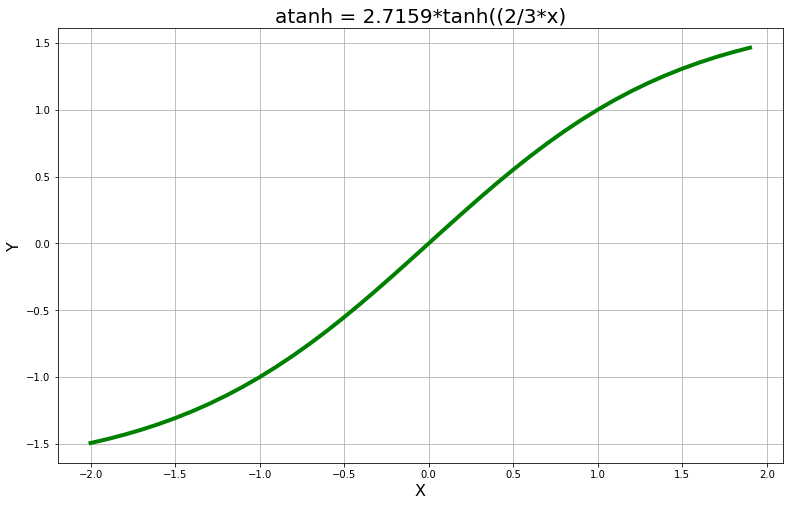

In [33]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(-2, 2.0, 0.1)
y_ = 1.7159*tanh((2/3*x_))

#Samples and function F are plotted
plt.figure(figsize=(13,8))
plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)
plt.title('atanh = 2.7159*tanh((2/3*x)', size=20)

#Plotting function
plt.plot(x_, y_, color='green', lw=4);

<font size=5 color='blue'>
Algoritmo que relaciona las variables X y Y

<font size= 4>
Se tienen $m$ muestras. 
    
Para una muestra $x^{(i)}$:

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

$z^{(i)}$ es la combinacion lineal entre los pesos ($w$) y la muestra $x^{(i)}$ + el bias b. Posteriormente esta sumatoria es activada, para generar le valor de salida $a^{(i)}$, mediante una función: en el presente caso función es una *atanh*, porque consideramos que la relación es ligeramente no-lineal.

$$f(z^{(i)}) = a^{(i)} = atanh(z^{(i)}\tag{2})$$ 

La funcion de perdida (*loss*), tambien llamada costo *cost*, J, es el promedio, sobre todas las muestras, de la diferencia al cuadrado entre el valor medido ($y^{(i)}$) y el valor que predice la funcion de activacion ($f(x^{(i)})$).  

$$ J = \frac{1}{m} \sum_{i=1}^m (a^{(i)} - y^{(i)})^2\tag{3}$$




<font size=4>

Si la función atanh es: $$ atanh(z^{(i)}) = 1.7159*tanh(2*z^{(i)}/3) $$


La funcion de costo, $J$ está dada por:

$$ J = \dfrac{1}{m}\sum_{i=0}^{m}(1.7159*tanh(2*z^{(i)}/3)-y^{(i)})^2$$


Las derivadas de la funcion de costo respecto a los pesos $ w$ y el bias $ b$ es:


$$ \dfrac{\partial J(\omega, b)}{\partial \omega} = \dfrac{2}{m}\sum_{i}(a_1tanh(a_2(\omega x_i + b)) -y_i)(a_1(1-tanh^2(a_2(\omega x_i + b))))(a_2x_i)$$

$$ \dfrac{\partial J(\omega, b)}{\partial b} = \dfrac{2}{m}\sum_{i}(a_1tanh(a_2(\omega x_i + b)) -y_i)(a_1(1-tanh^2(a_2(\omega x_i + b))))a_2$$



    
## 1. Se inicializan las variables del algoritmo que define la relación entre X y Y. 

In [34]:
def initialize_params_1(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [35]:
def atanh(z):
    return 1.7159*np.tanh((2/3)*z)

In [36]:
def d_atanh(z):
    return 1.7159*(1-np.square(atanh(z)))*(2/3)

In [37]:
# Probando el código

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.04089993]
 [ 0.02443844]
 [ 0.06088997]
 [ 0.04600324]
 [-0.08627221]
 [ 0.00807852]
 [-0.05959545]
 [-0.04104622]
 [ 0.05338457]
 [-0.08920497]]
b = 0


In [38]:
def propagate_1(w, b, X, Y, X_val, Y_val):
    
    m = X.shape[1]
    m_val = X_val.shape[1]
    
    A = atanh(np.dot(w.T, X)+b)
    A_val = atanh(np.dot(w.T,X_val)+b)
    
    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)
    
    dA = A-Y
    dZ = d_atanh(np.dot(w.T, X)+b)
    
    dw = (1/m)*np.dot(dA, (dZ*X).T).T    
    db = (1/m)*np.sum((A-Y)*(1-np.power(A, 2)), axis=1, keepdims=True)  
    
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, cost_val

In [39]:
x1_val = np.array([[1.,2.,-2.],[2.,4.,-3.2]])
y1_val = np.array([[1,0,2]])

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost, cost_val = propagate_1(w, b, X, Y,x1_val, y1_val)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[ -5.07757178]
 [-13.08893287]]
db = [[0.17455838]]
cost = 3.6063356189939464


<font size=4>
    
La funcion *optimize_1(  )*  actualiza los pesos $w$ y el bias $b$ empleando el método de gradiente descendente.

Los pesos $ w $ y el bias $ b $ son modificados hasta que alcanzar el mínimo de la función de costo $ J $. 

Para el peso $ w $, la regla de actualización es $ w = w - \alpha \text {} dw $, donde $ \alpha $ es el parámetro de aprendizaje (learning_rate).

Para el bias $ b $, la regla de actualización es $ b = b - \alpha \text {} db $, donde $ \alpha $ es el parámetro que define la relación de aprendizaje (learning_rate).

In [40]:
def optimize_1(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):
    
    costs = []
    costs_val = []
    
    for i in range(epochs):
        
        grads, cost, cost_val = propagate_1(w, b, X, Y, X_val, Y_val)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after iteration %i: %f %f" %(i, cost, cost_val))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, costs_val

In [41]:
epochs = 100
params, grads, costs, costs_val = optimize_1(w, b, X, Y, x1_val, y1_val, epochs=epochs, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 5.57950249]
 [13.81103216]]
b = [[1.83448553]]
dw = [[ -5.08859121]
 [-13.12418521]]
db = [[0.18412642]]


<font size=4>
Una vez que se encuentran los valores del peso w y del bias b que minimizan la función de costo, se emplean para inferir los valores Y asociados a un conjunto de datos X.

La función `predic ()` calcula $ Y = f(W ^ T X + b) $


In [42]:
def predict_1(w, b, X):
    
    #m = X.shape[1]
    #Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #A = sigmoid(np.dot(w.T, X)+b)
    A = atanh(np.dot(w.T, X)+b)
    
    return A

In [43]:
w = np.array([[0.1124579],[0.23106775]])
b = 0.0
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict_1(w, b, X)))

predictions = [[ 0.43606665  0.38070532 -0.37888495]]


<font size=4>
Para estructurar el modelo se juntan todos las funciones implementadas en las partes anteriores, en el orden correcto.


In [44]:
def model_1(X_train, Y_train, X_val, Y_val, epochs = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_val -- test set represented by a numpy array of shape (num_px * num_px * 3, m_val)
    Y_val -- test labels represented by a numpy array (vector) of shape (1, m_val)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
        
    # initialize parameters
    w, b = initialize_params_1(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs, costs_val = optimize_1(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    print(w.shape)
    
    # Predict val/train set examples
    Y_prediction_val = predict_1(w, b, X_val)
    Y_prediction_train = predict_1(w, b, X_train)

    # Print train/val Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("val accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))

    
    d = {"costs": costs,"costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epochs}
    
    return d

In [45]:
epochs = 1000
learning_rate = 0.005

d = model_1(train_x, train_y.T, val_x, val_y.T, epochs = epochs, 
          learning_rate = learning_rate, print_cost = True)

Cost and Cost_val after iteration 0: 1.186621 0.894079
Cost and Cost_val after iteration 100: 0.576481 0.576015
Cost and Cost_val after iteration 200: 0.528783 0.510885
Cost and Cost_val after iteration 300: 0.511239 0.472849
Cost and Cost_val after iteration 400: 0.502520 0.451424
Cost and Cost_val after iteration 500: 0.497527 0.439339
Cost and Cost_val after iteration 600: 0.494403 0.432382
Cost and Cost_val after iteration 700: 0.492334 0.428286
Cost and Cost_val after iteration 800: 0.490914 0.425831
Cost and Cost_val after iteration 900: 0.489916 0.424352
(10, 1)
train accuracy: 51.07924099279717 %
val accuracy: 57.65283473127993 %


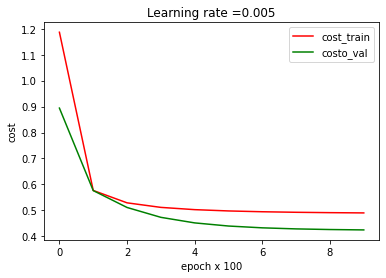

In [46]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.plot(costs, color='red')
plt.plot(costs_val, color='green')
plt.ylabel('cost')
plt.xlabel('epoch x 100')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['cost_train', 'cost_val'],loc=0);


learning rate is:  0.005
(10, 1)
train accuracy: 51.21297281719925 %
val accuracy: 57.660913854651255 %

-------------------------------------------------------

learning rate is:  0.003
(10, 1)
train accuracy: 50.50469291080631 %
val accuracy: 56.918389747771116 %

-------------------------------------------------------

learning rate is:  0.001
(10, 1)
train accuracy: 48.11596179773549 %
val accuracy: 50.46120426373675 %

-------------------------------------------------------



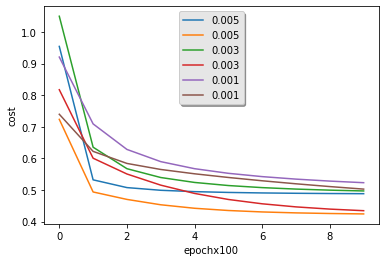

In [47]:
learning_rates = [0.005, 0.003, 0.001]
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model_1(train_x, train_y.T, val_x, val_y.T, epochs = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('epochx100')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<font size=5 color='blue'>

# <center> Artificial Neural Networks </center>




In [48]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(10, 397)
(397, 1)
(10, 45)
(45, 1)


In [49]:
train_y = train_y.T
val_y = val_y.T

In [50]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(10, 397)
(1, 397)
(10, 45)
(1, 45)


<font size=5 color='blue'>
Implementación de una red neuronal del tipo "Feedforward".

<font size=4>

<p>La red neuronal tiene 3 capas: la capa de entrada, la capa de salida y una capa interior (en la literatura, se le da el nombre de capa oculta). </p>
<p>El objetivo es encontrar una función que describa la evolución de la diabetes con los rasgos de la persona que se consideran importantes para su evolución. Los rasgos propuestos son: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo.</p>
<p>Esta función se genera mediante una red de neuronas. Se entiende como neurona un modelo matemático simple de una neurona biológica.</p>
</font>

<font size=4>
    
1.1 Definición de la arquitectura de la red neuronal.

Se emplea indistintamente la palabra neurona o nodo para referirse al modelo matemático de la neurona.

La red neuronal esta compuesta de varias capas, la capa de entrada, la capa de salida, y varias capas internas. En la literatura, las capas internas son conocidas como capas ocultas, porque el entorno exterior a la red neuronal solo tiene contacto con la capa de entrada y la capa de salida.

El número de nodos en la capa de entrada depende del numero de rasgos del sistema que definen la variable objetivo, la evolución de la diabetes. En el presente caso el número de rasgos es diez.

El número de nodos en la capa de salida depende del tipo de problema. En el presente caso, se tiene una sola neurona, cuya salida nos da un número que cuantifica la evolución de la diabetes.

En el presente modelo, sólo tenemos una capa interna, el número de nodos en ella es variable. Se hacen pruebas con diferentes números y se adopta el valor que da mejores resultados.

La función layer_sizes() genera la arquitectura de la red neuronal partiendo de los datos con que se van a alimentar a la red.


In [51]:
def layer_sizes(X, Y, n_h):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] 
    n_h = n_h
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [52]:
n_h = 4
n_x, n_h, n_y = layer_sizes(train_x, train_y, n_h = n_h)

In [53]:
print(n_x, n_h, n_y)

10 4 1


In [ ]:
# Viualización de la arquitectura que define a la red neuronal:

Tu red quedo asignada por:  [10, 4, 1]


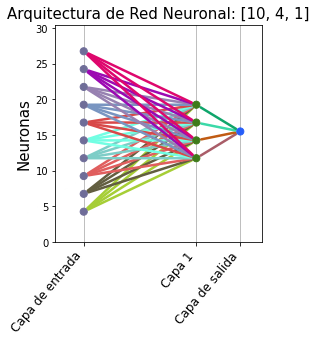

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.patches import ConnectionPatch

import math as M
import random


#Vector principal, este lo modifica el usuario.
vector = [10, 4, 1]

'''#Esta seccion de abajo en rojo es por si el usuario gusta interactuar un poco.

valor=int(input("Ingresar valor de la capa de entrada (-1 para finalizar): "))
while valor!=-1:
    vector.append(valor)
    valor=int(input("Ingresar valor (-1 para finalizar): "))'''

print('Tu red quedo asignada por: ', vector)

fig, ax = plt.subplots(1)

num_capas = len(vector)  

radio = 0.5                  

margen_x = 0
margen_y = 3

d_nodos = 5*radio                 

origen_x = radio*4 +  margen_x     
origen_y = radio*4 +  margen_y    

lista_general_x=[]
lista_general_y=[]

for i in range(num_capas):                 
    exec('Nnodos_capa{} = vector[i]'.format(i))            

for i in range(num_capas):              
    exec('lista_capa{}_x = []'.format(i))
    exec('lista_capa{}_y = []'.format(i))

    
#____________________________________________________CIRCULOS_______________________________________________#


delta_post = 0  
delta_ante = 0
k_i_1 = 0

Nodo_max_y=max(vector)
Y_nodo_max_y = round(origen_y + ((Nodo_max_y-1)*d_nodos), 6)  
for m in range(num_capas):       
    exec('k = Nnodos_capa{}'.format(m))  
    
    Rc=round(random.random(),4)
    Gc=round(random.random(),4)
    Bc=round(random.random(),4)
    
    for i in range(k):     
        delta_post = (M.log(k_i_1 + 1))**3 + 2 
        
        X = round(origen_x + delta_ante + delta_post , 6)    
        
        altmax_capak = round(origen_y + (k*d_nodos), 6)
        
        delta_h = ((Y_nodo_max_y)-(altmax_capak-1))/2 
        
        Y = round(origen_y + (i*d_nodos) + delta_h, 6)
        
        exec('lista_capa{}_x.append(X)'.format(m))
        exec('lista_capa{}_y.append(Y)'.format(m))
        
        circ = Circle((X, Y), radio, zorder=5, color=(Rc,Gc,Bc)) 
        
        ax.add_patch(circ)  
    delta_ante = X - origen_x         
    k_i_1 = k        
    exec('lista_general_x.append(lista_capa{}_x)'.format(m)) 
    exec('lista_general_y.append(lista_capa{}_y)'.format(m)) 


for l in range(num_capas):
    exec('stalker_neuronal{} = list(zip(lista_general_x[l], lista_general_y[l]))'.format(l)) 

    
#_______________________________________________________LINEAS______________________________________#


for n in range(num_capas-1):    
    exec('long_capa_inicial = len(stalker_neuronal{})'.format(n))
    
    for i in range(long_capa_inicial):  
        exec('xyA = stalker_neuronal{} [i]'.format(n))        
        
        exec('long_capa_final = len(stalker_neuronal{})'.format(n+1))  
        
        Rl=round(random.random(),4)
        Gl=round(random.random(),4)
        Bl=round(random.random(),4)
        
        for l in range(long_capa_final):  
            exec('xyB = stalker_neuronal{} [l]'.format(n+1))  
            
            linea = ConnectionPatch(xyA, xyB, coordsA = "data", coordsB = "data",   
                      arrowstyle="-", linewidth=2.5,color=(Rl,Gl,Bl),shrinkA=5, shrinkB=5,
                      mutation_scale=1)
            
            ax.add_artist(linea)      
                
                
#___________________________________________CONFIGURACION DE LA IMAGEN_______________________________#            
            
altura_img = Y_nodo_max_y + margen_y  

encuadre_x = lista_general_x[num_capas - 1][0] + margen_x 
largo_img = encuadre_x + 3      

ax.set_xlim(0,largo_img)   
ax.set_ylim(0,altura_img)    


nombre_marcas_x = [] 

for i in range(num_capas):
    if i == 0:
        nombre = str('Capa de entrada')  
    elif i <= (num_capas-2):
        nombre = str('Capa ' + str(i))       
    elif i == (num_capas-1):
        nombre = str('Capa de salida') 
        
    nombre_marcas_x.append(nombre)       



marcas_en_x = []  
for i in range(num_capas):
    marca = lista_general_x[i][0]  
    marcas_en_x.append(marca)     


    
ax.set_xticks(marcas_en_x)           
ax.set_xticklabels(nombre_marcas_x)   

plt.setp(ax.get_xticklabels(), fontsize = 12,     
         rotation=50, ha="right")  

string_de_red = str(vector)  
titulo_completo = ('Arquitectura de Red Neuronal: ' + string_de_red)   

ax.set_title(titulo_completo, fontsize = 15)   
ax.set_ylabel('Neuronas', fontsize = 15)       

ax.set_aspect('equal')   
ax.grid(axis = 'x')  


## 1.2 Inicializacion de los pesos y el bias.

<font size=4>

La funcion *initialize_parameters()* inicializa a los pesos $W$ y el bias $b$. 

Dado que se tiene un conjunto de variables independientes, se debe definir un peso para cada variable, esto para una sola neurona de la siguiente capa. 

Entonces $W_1$ ahora es una matriz de tamaño $(n_h, n_x)$, en donde $n_h$ es el numero de nodos en la capa interna y $n_x$ es el número de nodos en la capa de entrada, es decir, es el número de variables independientes.

Por cada neurona en la capa interna hay un bias, por lo que ahora $b_1$ es un vector de tamaño $(n_h, 1)$. 

En general para cada par de capas consecutivas debe haber un $W$ y un $b$.

Generalizando:

$W_i$ y $b_i$ son los parametros a definir entre la capa $i$ y la capa $i+1$. Si la capa $i$ tiene $n_i$ neuronas y la capa $i+1$ tiene $n_{i+1}$ neuronas entonces, las dimensiones de $Wi$ son $(n_{i+1}, n_i)$ y las dimensiones de $b_i$ son $(n_{i+1}, 1)$.

In [55]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 
    W1 = np.reshape(np.random.uniform(-0.1, 0.1, n_h*n_x), (n_h, n_x))
    b1 = np.zeros((n_h, 1))
    W2 = np.reshape(np.random.uniform(-0.1, 0.1, n_y*n_h), (n_y, n_h))
    b2 = np.zeros((n_y, 1))
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [56]:
initialize_parameters(n_x, n_h, n_y)

{'W1': array([[-0.01280102, -0.09481475,  0.0099325 , -0.01293552, -0.01592644,
         -0.03393304, -0.05907027,  0.02385419, -0.04006907, -0.04663454],
        [ 0.02422677,  0.00582842, -0.07308401,  0.00271562, -0.06311203,
          0.05706703,  0.07079506, -0.00115263,  0.0693123 , -0.0840709 ],
        [ 0.00104922, -0.0869427 , -0.01437553, -0.08069382, -0.07456801,
          0.01934906, -0.0547976 , -0.07861086, -0.05593876, -0.03003474],
        [-0.0064425 , -0.05965135,  0.02808135, -0.00338603,  0.00104734,
         -0.02262147,  0.05872749,  0.01600084, -0.06754028,  0.04015047]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 9.29102160e-02,  1.67223404e-06,  7.79040128e-02,
         -3.16772695e-02]]),
 'b2': array([[0.]])}

<font size=4>

## 2. Conexión entre las neuronas de capas contiguas.


La función *propagate()* realiza la combinación lineal entre los valores de salida de los nodos de una capa con los pesos y bias definidos entre esa capa y la siguiente. 

La función de activación que se aplica a esta sumatoria, es para considerar efectos no lineales.


___

Funciones de activación disponibles en la presente notebook: 

In [57]:
#Función para considerar los efectos no lineales.
#En el presente caso se considera un modelo completamente lineal.
#Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z
    
    return s

In [58]:
def identity_derivative(z):
    return 1.0 * z * (1/z)

In [59]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

In [60]:
def tanh_derivative(z):
    return 1-np.power(tanh(z), 2)

In [61]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    return s

In [62]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

In [63]:
def propagate(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    m = Y.shape[1] # number of samples
    cost = (1/m)*np.sum((Y-A2)**2)
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*tanh_derivative(A1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    
    return A2, cache, cost, grads

In [64]:
def validation(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    Y -- output data of size (n_y, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    cost -- the value of cost
    grads -- a dictionary contains derivatives to update parameters
    """
    # Regresa cada parametro del diccionario "parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Pasos 1 y 2:
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi:
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    # se verifican las dimensiones de A2:
    
    assert(A2.shape == (1, X.shape[1]))

    # Paso 3:
    
    # numero de muestras:
    
    m = Y.shape[1] 
    
    # se calcula el costo:

    cost = (1/m)*np.sum((Y-A2)**2)
    
    # Asegura que cost sea un escalar:
    
    cost = np.squeeze(cost)      
                                
    assert(isinstance(cost, float))  
    
    return cost

<font size=4>

## 3. Cálculo de la función de perdida (costo) durante la optimización de los parámetros que definen al modelo.

Recordemos que la funcion de costo, $J$, nos permite saber qué tan bien se esta ajustando el modelo a la variable objetivo de las muestras. 

Para ello se buscan los parámetros que minimicen a esta función. 

En el presente caso, la función de costo está definida por la relación siguiente: 

$$J = \dfrac{1}{m}\sum_{i=0}^{m}(y^{(i)}-a^{(i)})^2$$

In [65]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of samples
    cost = (1/m)*np.sum((Y-A2)**2)
    cost = np.squeeze(cost)   
                                
    assert(isinstance(cost, float))
    
    return cost

<font size=4>

Para encontrar a los valores optimos de los parametros, estos se acualizan en cada época empleando el algoritmo de gradiente descendente. El cual esta definido por la siguientes relaciones:

$$ \omega := \omega - \alpha \dfrac{\partial J(\omega, b)}{\partial \omega}$$

$$ b := b - \alpha \dfrac{\partial J(\omega, b)}{\partial b}$$

Es por ello necesario calcular las derivadas del costo respecto a cada uno de los parametros.

In [66]:
def calculation_of_derivatives(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

<font size=5 color='blue'>
4. Optimizacion de los pesos y los bias.

In [67]:
def optimize(parameters, grads, learning_rate = 0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

<font size=5 color='blue'>
5. Las predicciones se realizan con los parámetros óptimos encontrados en el entrenamiento.

In [68]:
def predict(parameters, X, Y):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    predictions =  []
    A2, cache, cost, grads = propagate(X, Y, parameters)
    predictions = identity(A2) 
    
    return predictions

<font size=5 color='blue'>
    
Las funciones anteriores se integran para generar, entrenar y validar la red neuronal.

In [69]:
def nn_model(X, Y, X_dev, Y_dev, n_h, epochs, alpha, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    
    n_x, n_h, n_y = layer_sizes(train_x, train_y, n_h = n_h)
        
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"] 
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    
    costs=[]
    costs_dev = []
    params = []
    

    for i in range(0, epochs):
         
        A2, cache, cost, grads = propagate(X, Y, parameters)
        
        cost_dev = validation(X_dev, Y_dev, parameters)
 
        parameters = optimize(parameters, grads, alpha)
        
        params.append(parameters)
        
        costs.append(cost)
        
        costs_dev.append(cost_dev)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val in epoch %i: %f %f" %(i, cost, cost_dev))
            
    return parameters, costs, params, costs_dev

<font size=5 color='blue'>

Entrenamiento:

In [70]:
epochs = 2000
learning_rate = 0.008
n_h = 4

opt_parameters, costs, params, costs_dev = nn_model(train_x, train_y, val_x, val_y, n_h = n_h, epochs = epochs, alpha=learning_rate, print_cost=True)


Cost and Cost_val in epoch 0: 1.018807 0.785340
Cost and Cost_val in epoch 100: 0.805033 0.672106
Cost and Cost_val in epoch 200: 0.547773 0.565549
Cost and Cost_val in epoch 300: 0.503171 0.482549
Cost and Cost_val in epoch 400: 0.489173 0.428602
Cost and Cost_val in epoch 500: 0.484849 0.408046
Cost and Cost_val in epoch 600: 0.483208 0.401654
Cost and Cost_val in epoch 700: 0.482326 0.400140
Cost and Cost_val in epoch 800: 0.481726 0.400168
Cost and Cost_val in epoch 900: 0.481261 0.400611
Cost and Cost_val in epoch 1000: 0.480867 0.401105
Cost and Cost_val in epoch 1100: 0.480513 0.401550
Cost and Cost_val in epoch 1200: 0.480184 0.401929
Cost and Cost_val in epoch 1300: 0.479869 0.402251
Cost and Cost_val in epoch 1400: 0.479563 0.402532
Cost and Cost_val in epoch 1500: 0.479264 0.402782
Cost and Cost_val in epoch 1600: 0.478968 0.403014
Cost and Cost_val in epoch 1700: 0.478673 0.403235
Cost and Cost_val in epoch 1800: 0.478378 0.403450
Cost and Cost_val in epoch 1900: 0.478082 0

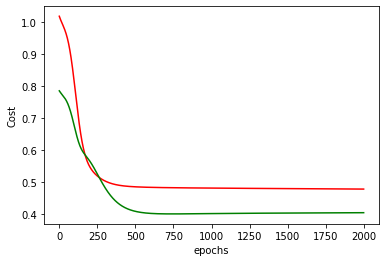

In [71]:
costs = np.squeeze(costs)
plt.plot(costs, color='red')
plt.plot(costs_dev, color='green')

plt.ylabel('Cost')
plt.xlabel('epochs')
plt.show()

<font size=4>
    
 ## Precision:

Para calcular la precision del modelo se usa MSE:

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m}\Sigma_{i}(y_{i}-a_{i})^2)*100$$

In [72]:
predictions_train = predict(opt_parameters, train_x, train_y)

print("train accuracy: {} %".format(100 - np.mean(np.power(predictions_train-train_y, 2)) * 100))


train accuracy: 52.22169869436115 %


In [73]:
predictions_val = predict(opt_parameters, val_x, val_y)

print("val accuracy: {} %".format(100 - np.mean(np.power(predictions_val-val_y, 2)) * 100))


val accuracy: 59.61196996737302 %
